# Employee Attrition Analysis
---
- Tableau Dashboard Link [(Click Here)](https://public.tableau.com/views/employee_attrition_dashboard/Author?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link) <br>
- or copy this link below :<br>
https://public.tableau.com/views/employee_attrition_dashboard/Author?:language=en-US&publish=yes&:display_count=n&:origin=viz_share_link

## Introduction

1. **Background**

In today's dynamic and competitive business landscape, employee attrition has emerged as a significant concern for organizations worldwide. Employee attrition, often referred to as employee turnover, is the phenomenon of employees leaving an organization and needing to be replaced. This phenomenon can have far-reaching consequences on an organization's performance, productivity, and overall success. Identifying the underlying factors that contribute to employee attrition and developing effective strategies to manage it are crucial steps for any business aiming to maintain a talented and motivated workforce.

2. **Problem Statement**

The purpose of this analysis is to identify the main factors that contribute to the level of employee attrition in the company. By understanding these factors, strategic steps can be taken to decrease the employee turnover and maintain workforce stability.

3. **Problem Statement Exploration**
    - How much the employee attrition rate who left the company?
    - What is the profile of employees more likely to leave the company?
    - How long is the average of the employee stay at the company? what is the range ?
    - What factors that has dependent to the turnover decision?
    - etc.


4. **Import the required libraries and modules**

During the analysis process we will need several libraries and modules to support the analysis process for data manipulation, visualization, statistical analysis and etc.

In [2]:
# Data Manipulation
import pandas as pd
import numpy as np

# Statistical Analysis
from scipy import stats

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Data Loading

- Data source: 
    - HR Analytics Case Study from Kaggle  [(*Click Here!*)](https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study)
    - or copy the link : https://www.kaggle.com/datasets/vjchoudhary7/hr-analytics-case-study
- There are 3 Tables with columns details :

| Column Name   | Description                                 | Details                           |
|---------------|---------------------------------------------|-----------------------------------|
| Age           | Age of the employee                         |                                    |
| Attrition      | Whether the employee left in the previous year or not       |         |
| BusinessTravel      | How frequently the employees travelled for business purposes in the last year        |            |
| Department           | Department in company         |              |
| DistanceFromHome  | Distance from home in kms         |            |
| Education   | Education Level             | 1:'Below College', 2:'College', 3:'Bachelor', 4:'Master', 5:'Doctor'     |
| EducationField  | Field of education         |          |
| EmployeeCount | Employee count | |
|EmployeeNumber | Employee number/id|  |
| EnvironmentSatisfaction | Work Environment Satisfaction Level | 1:'Low', 2:'Medium', 3:'High', 4:'Very High'|
| Gender | Gender of employee |   |
| JobInvolvement | Job Involvement Level | 1:'Low', 2:'Medium', 3:'High', 4:'Very High'|
| JobLevel | Job level at company on a scale of 1 to 5 |   |
| JobRole | Name of job role in company |   |
| JobSatisfaction | Job Satisfaction Level | 1:'Low', 2:'Medium', 3:'High', 4:'Very High'|
| MaritalStatus | Marital status of the employee |  |
| MonthlyIncome | Monthly income in rupees per month |  |
| NumCompaniesWorked | Total number of companies the employee has worked for |  |
| Over18 | Whether the employee is above 18 years of age or not |  |
| PercentSalaryHike |Percent salary hike for last year |  |
| PerformanceRating | Performance rating for last year | 1:'Low', 2:'Good', 3:'Excellent', 4:'Outstanding' |
| StandardHours | Standard hours of work for the employee |   |
| StockOptionLevel | Stock option level of the employee  |   |
| TotalWorkingYears | Total number of years the employee has worked so far |  |
| TrainingTimesLastYear | Number of times training was conducted for this employee last year |  |
| WorkLifeBalance | Work life balance level | 1:'Bad', 2:'Good', 3:'Better', 4:'Best'|
| YearsAtCompany | Total number of years spent at the company by the employee |  |
| YearsSinceLastPromotion | Number of years since last promotion |   |
| YearsWithCurrManager | Number of years under current manager  |   |


- Loading the Tables

In [3]:
# Load the general tables
general = pd.read_csv('general_data.csv')

# Load the employee survey data
emp = pd.read_csv('employee_survey_data.csv')

# Load the manager survey data
mgr = pd.read_csv('manager_survey_data.csv')

# Display the data
display(general.head())
display(emp.head())
display(mgr.head())

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


In [4]:
'''
From the tables we could see those tables are connected through employee id. 
Therefore we will join those tables, to make analysis easier
'''
# join General table with employee survey table
join = general.join(emp.set_index('EmployeeID'), on='EmployeeID')

# Next Join with the Manager survey table
df = join.join(mgr.set_index('EmployeeID'), on='EmployeeID')

df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [5]:
# Check dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

Now from the information above we could see that the data has:
- 4410 entries
- 29 columns consist 5 floats, 16 int, and 8 objects columns
- At first glance, there are missing values ​​in the table. Analyst will look at and handle it in the next step

The data successfully  loaded into the notebook, now we could move into the next step *Data Cleaning*

## Data Cleaning

Before the analysis process begins, the data will go through a data cleaning process which includes but is not limited to handling missing values, handling duplicates, data manipulation, etc.

In [6]:
# Check for duplicates
df.duplicated().sum()

0

the dataframe does not have duplicated data, next we check the missing value

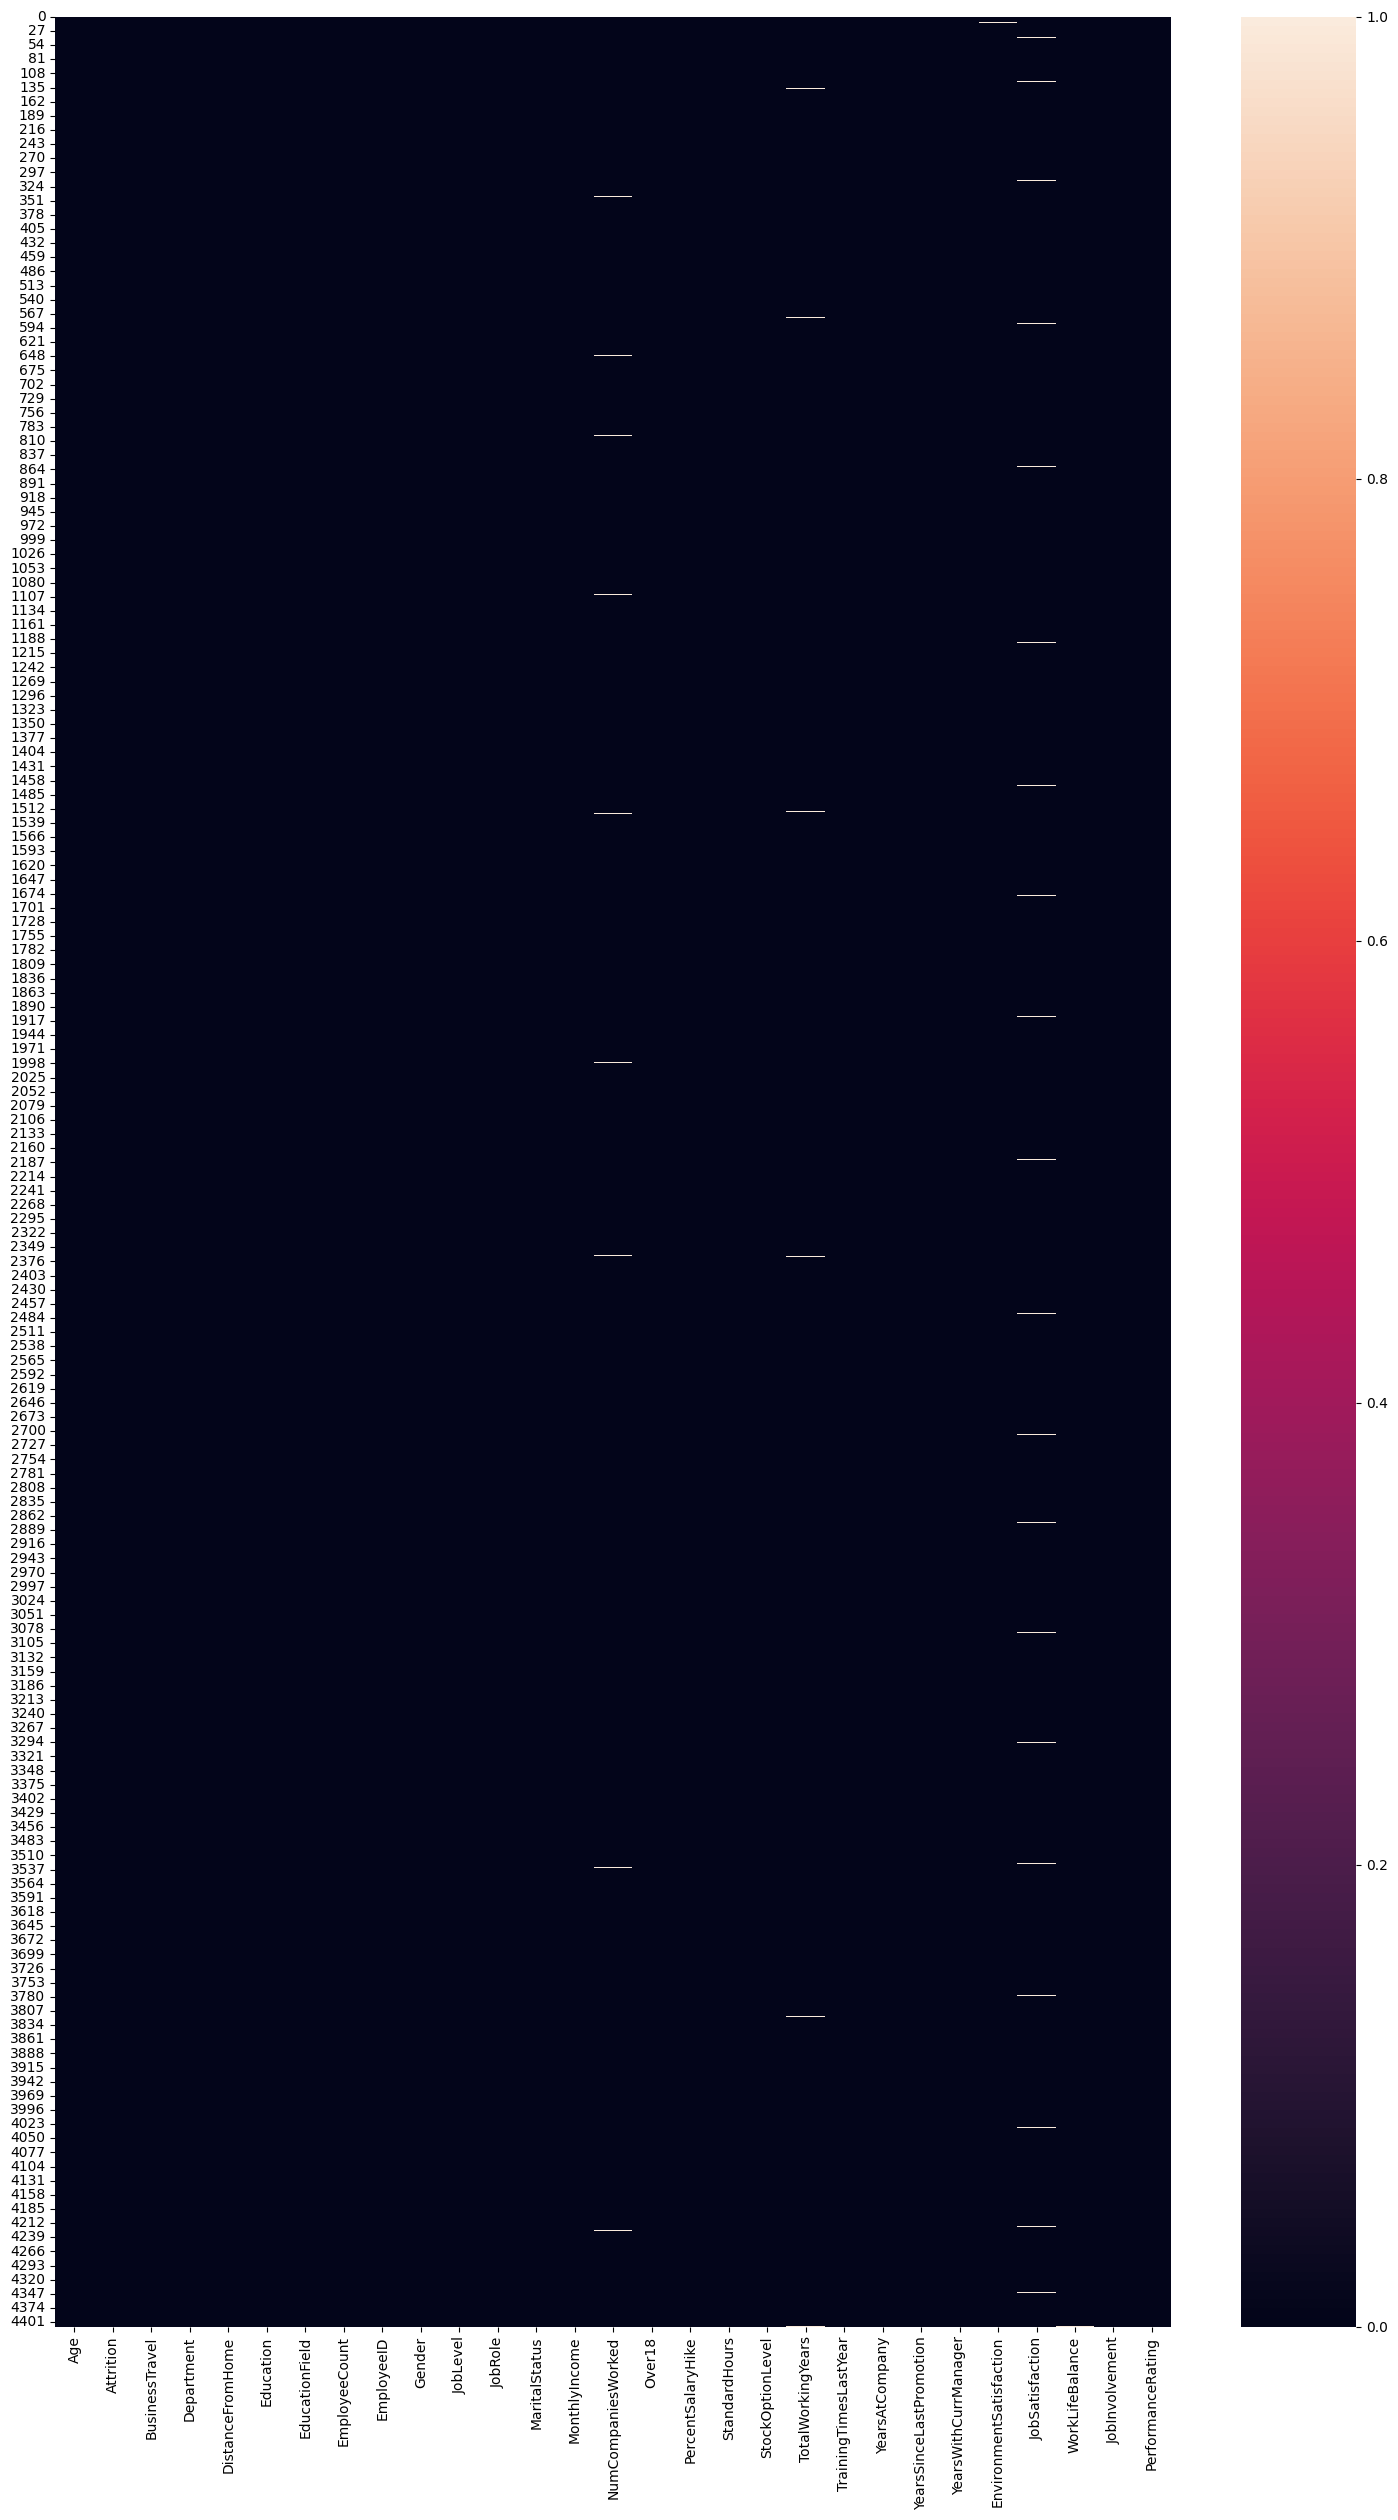

In [7]:
# Visualize the missing value
plt.figure(figsize=(18,30))
sns.heatmap(df.isna())
plt.show()

The heatmap above could tell Analyst which columns that has missing values, the white space indicate missing values that a column has.

In [8]:
# Check for missing values details
print(f'total missing values: {df.isna().sum().sum()} entries')
print(f'total missing values in percent : {(df.isna().sum().sum()/len(df)*100):.2f}%')

df.isna().sum().sort_values(ascending=False)

total missing values: 111 entries
total missing values in percent : 2.52%


WorkLifeBalance            38
EnvironmentSatisfaction    25
JobSatisfaction            20
NumCompaniesWorked         19
TotalWorkingYears           9
Over18                      0
JobInvolvement              0
YearsWithCurrManager        0
YearsSinceLastPromotion     0
YearsAtCompany              0
TrainingTimesLastYear       0
StockOptionLevel            0
StandardHours               0
PercentSalaryHike           0
Age                         0
Attrition                   0
MonthlyIncome               0
MaritalStatus               0
JobRole                     0
JobLevel                    0
Gender                      0
EmployeeID                  0
EmployeeCount               0
EducationField              0
Education                   0
DistanceFromHome            0
Department                  0
BusinessTravel              0
PerformanceRating           0
dtype: int64

The missing value informations that Analyst get:
- There are 111 missing values
- The percentage of it is 2.52% from the total entries
- the columns that have missing value are `WorkLifeBalance`, `EnvironmentSatisfaction`, `JobSatisfaction`, `NumCompaniesWorked` and `TotalWorkingYears`

There are several methods to handle the missing values, in this case Analyst will handle it with the method belows
- Modus : `WorkLifeBalance`, `EnvironmentSatisfaction`, `JobSatisfaction` (since these data is ordinal categorical)
- Median : `NumCompaniesWorked`, `TotalWorkingYears` (This data is numerical)

In [9]:
# Checking the median value
df[['TotalWorkingYears', 'NumCompaniesWorked']].describe()

,TotalWorkingYears,NumCompaniesWorked
count,4401.000000,4391.000000
mean,11.279936,2.694830
std,7.782222,2.498887
min,0.000000,0.000000
25%,6.000000,1.000000
50%,10.000000,2.000000
75%,15.000000,4.000000
max,40.000000,9.000000


The median value of TotalWorkingYears : 10 years <br>
The median value of NumCompaniesWorked : 2 companies

In [10]:
# Checking for Mode
cols = ['WorkLifeBalance', 'EnvironmentSatisfaction', 'JobSatisfaction']

for col in cols:
    print(f'Mode value of {col} : {df[col].mode()[0]}')

Mode value of WorkLifeBalance : 3.0
Mode value of EnvironmentSatisfaction : 3.0
Mode value of JobSatisfaction : 4.0


In [11]:
# Fill the missing value with median
cols = ['TotalWorkingYears', 'NumCompaniesWorked']

for col in cols:
    df[col].fillna(df[col].median(), inplace=True)

# Fill the missing value with mode
cols = ['WorkLifeBalance', 'EnvironmentSatisfaction', 'JobSatisfaction']

for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


In [12]:
# Cross-check the missing values whether the missing value still exist or not
df.isna().sum().sum()

0

Missing value has been handled successfully.

Some of the column values are in discrete number eventhough actually it mean a cataegorical value. Therefore, Analyst will change the value for better analysis and gain usefull insight.

In [13]:
# Change education label
education_labels = {
    1: 'Below College',
    2: 'College',
    3: 'Bachelor',
    4: 'Master',
    5: 'Doctor'
}

# Apply map function to the column
df['Education'] = df['Education'].map(education_labels)


In [14]:
# Change the survey label
suvery_labels = {
    1:'Low', 
    2:'Medium', 
    3:'High', 
    4:'Very High'
}

# Apply map function to the columns
df['EnvironmentSatisfaction'] = df['EnvironmentSatisfaction'].map(suvery_labels)
df['JobInvolvement'] = df['JobInvolvement'].map(suvery_labels)
df['JobSatisfaction'] = df['JobSatisfaction'].map(suvery_labels)


In [15]:
# Change the performance label
performance_labels = {
    1:'Low', 
    2:'Good', 
    3:'Excellent', 
    4:'Outstanding'
}

# Apply map function to the columns
df['PerformanceRating'] = df['PerformanceRating'].map(performance_labels)

In [16]:
# Change the worklife label
worklife_labels = {
    1:'Bad', 
    2:'Good', 
    3:'Better', 
    4:'Best'
}

# Apply map function to the columns
df['WorkLifeBalance'] = df['WorkLifeBalance'].map(worklife_labels)

In [17]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,College,Life Sciences,1,1,Female,...,1.0,6,1,0,0,High,Very High,Good,High,Excellent
1,31,Yes,Travel_Frequently,Research & Development,10,Below College,Life Sciences,1,2,Female,...,6.0,3,5,1,4,High,Medium,Best,Medium,Outstanding
2,32,No,Travel_Frequently,Research & Development,17,Master,Other,1,3,Male,...,5.0,2,5,0,3,Medium,Medium,Bad,High,Excellent
3,38,No,Non-Travel,Research & Development,2,Doctor,Life Sciences,1,4,Male,...,13.0,5,8,7,5,Very High,Very High,Better,Medium,Excellent
4,32,No,Travel_Rarely,Research & Development,10,Below College,Medical,1,5,Male,...,9.0,2,6,0,4,Very High,Low,Better,High,Excellent


## Analysis and Calculation

1. **Profile of employees who have left the company**

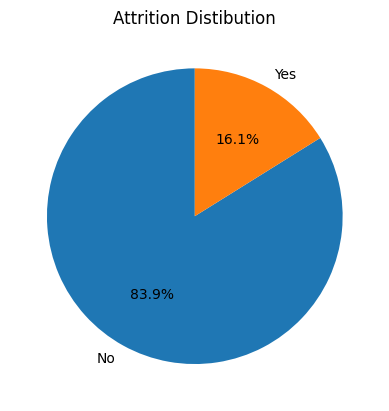

In [18]:
# Create a pie chart visualization of attrition distiribution
plt.pie(df['Attrition'].value_counts(), labels=df['Attrition'].value_counts().index,  autopct='%1.1f%%', startangle=90)

# Set title
plt.title('Attrition Distibution')
plt.show()

From the 4410 total data, the attribution rate who left the company is around 16.1% or 711 data entries

In [19]:
# Slice the neccessary columns that has attrition status 'yes'
emp_profile = df[['Age', 'Gender', 'MaritalStatus', 'Department', 'Education', 'EducationField']][df['Attrition']=='Yes']

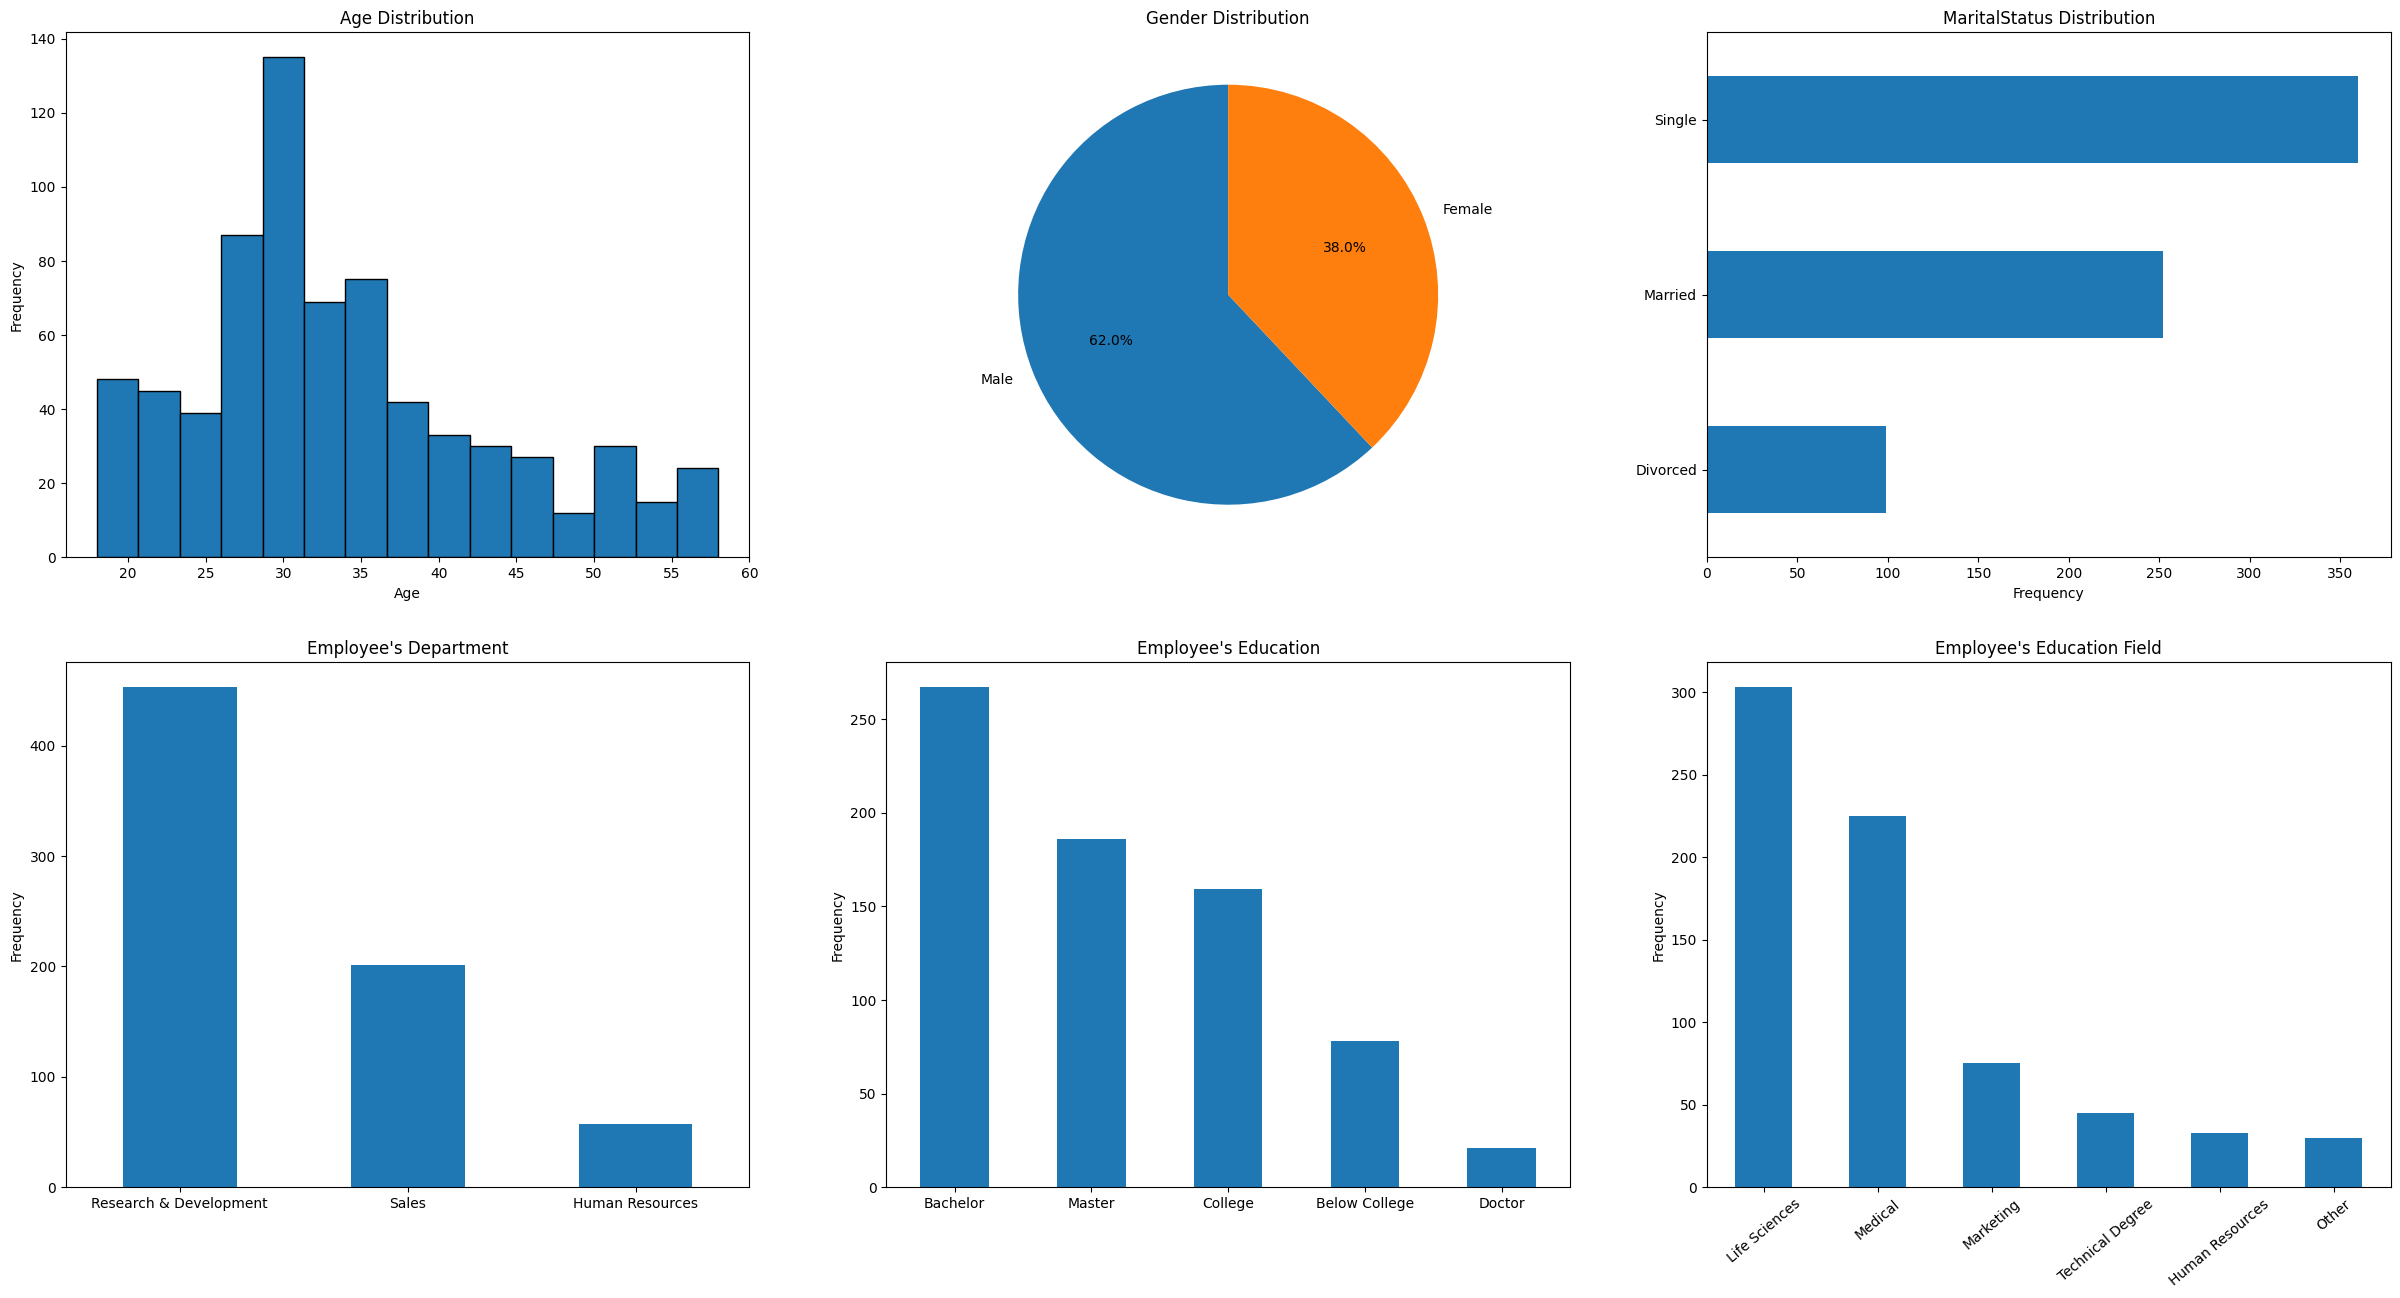

In [31]:
# Visualize the characteristics
# Create subplots
fig, ax = plt.subplots(2, 3, figsize=(30,15))

# Age's graph
ax[0,0].hist(emp_profile['Age'], bins=15, edgecolor='black')
ax[0,0].set_title('Age Distribution')
ax[0,0].set_xlabel('Age')
ax[0,0].set_ylabel('Frequency')

# Gender's graph
ax[0,1].pie(emp_profile['Gender'].value_counts(), labels=emp_profile['Gender'].value_counts().index,  autopct='%1.1f%%', startangle=90)
ax[0,1].set_title('Gender Distribution')

# Marital status's graph
emp_profile['MaritalStatus'].value_counts().sort_values().plot(kind='barh', ax=ax[0, 2])
ax[0, 2].set_title('MaritalStatus Distribution')
ax[0, 2].set_xlabel('Frequency')

# Employee's department graph
emp_profile['Department'].value_counts().plot(kind='bar', ax=ax[1, 0], rot=0)
ax[1,0].set_title("Employee's Department")
ax[1,0].set_ylabel('Frequency')

# Education graph
emp_profile['Education'].value_counts().plot(kind='bar', rot=0, ax = ax[1,1])
ax[1,1].set_title("Employee's Education")
ax[1,1].set_ylabel('Frequency')

# Education Field graph
emp_profile['EducationField'].value_counts().plot(kind='bar', rot=40, ax = ax[1,2])
ax[1,2].set_title("Employee's Education Field")
ax[1,2].set_ylabel('Frequency')

plt.show()

Based on the above visualization, it can be observed that the characteristics of employees who resigned are as follows:
- From the age data, it can be seen that employees leaving the company have a diverse age range. They are mostly in the age range of `25 - 35 years`.
- Gender is dominated by `males` around 62%
- In terms of marital status, the majority are `Single/unmarried`, and the fewest are `divorced`.
- The department that lost the most employees is the `Research and Development department`.
- They are mainly individuals with a `bachelor's degree`.
- The most common field of study is `Life Science`.

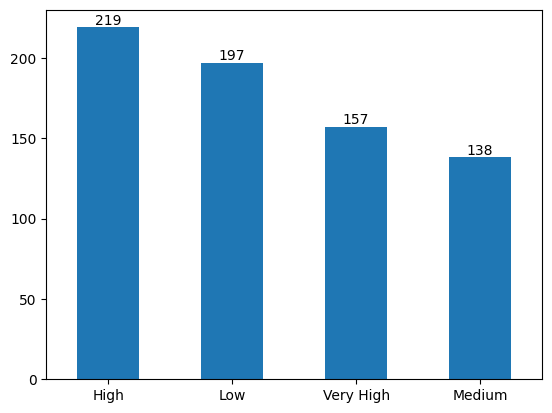

In [21]:
# Slice the jobsatisfaction of employee who left and count the value
attrition_yes_satisfaction = df['JobSatisfaction'][df['Attrition'] == 'Yes'].value_counts()

# Create the visualization
ax = attrition_yes_satisfaction.plot(kind='bar', rot=0)

# Add annotate of the bar chart
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

# Show the chart
plt.show()

The interesting insight from the job satisfaction analysis reveals that a significant number of employees who left the company (attrition 'Yes') expressed a high level of job satisfaction. This observation is noteworthy because it contradicts the common assumption that job dissatisfaction is a major driver of attrition.

However, the fact that the 'low' job satisfaction category comes in as the second highest could indicate that while a considerable number of employees left the company despite reporting high job satisfaction, there's also a notable portion who left due to dissatisfaction. This suggests that attrition is driven by a combination of factors beyond job satisfaction alone.

This phenomena will need futher analysis, Analyst we use statistical approach to see the significant influence of this aspect to the attrition.

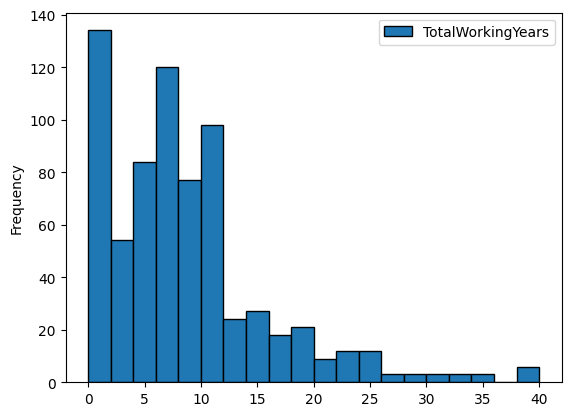

In [22]:
# Visualize the total working years
df[['TotalWorkingYears']][df['Attrition']=='Yes'].plot(kind='hist', bins=20, edgecolor='black')
plt.show()

The histogram shows the distribution of total working years who left the company, the data is not normally distributed, and has right-skewed shape. Most of the distribution show most of the left the company have been stay for less than 10 years at the company, the higher the experience also decrease the trends.

However Analyst only get some general and visual information of the data. Statistic approach will be needed for in depth analysis in the next process.

2. **How long they stay at the company**

This section will analyze the duration of their employment at the company. It will explore the maximum and minimum years they have spent, calculate the average duration, and identify the most common range within which they have spent their time at the company.

In [23]:
# Slice the dataframe that only contains data of employee who left the company
att_yes = df[df['Attrition']=='Yes']

In [24]:
# Check the central tendency of YearsAtCompany
mean = att_yes['YearsAtCompany'].mean()
median = att_yes['YearsAtCompany'].median()
mode = att_yes['YearsAtCompany'].mode()[0]

# Check the variability
std = att_yes['YearsAtCompany'].std()

# Print the result
print(f'Average score: {mean}')
print(f'Median score: {median}')
print(f'Mode score: {mode}')
print('=========================\n')
print(f'Standard Deviation score: {std}')


Average score: 5.1308016877637135
Median score: 3.0
Mode score: 1

Standard Deviation score: 5.941597860091119


The central tendency analysis give some insights such as:
- The average years at company of employee who left is around 5 years
- with the median score 3 years
- However it has 1 year as the mode value
- The standard deviation is around 5.9 years

The data has higher mean compare to the median, it indicates the data is not normally distributed and has tendency right-skewed shape.
Now Analyst will continue to analyze the confident interval of their years at the company

In [25]:
stats.normaltest(att_yes['YearsAtCompany'])

NormaltestResult(statistic=426.5029789957882, pvalue=2.4325112271666633e-93)

In [26]:
# Check the data normality with D'Agostino
res = stats.normaltest(att_yes['YearsAtCompany'])

# interpret results
alpha = 0.05
if res.pvalue > alpha:
    print('The data is Normal (fail to reject H0)')
else:
    print('The data is not Normal (reject H0)')

The data is not Normal (reject H0)


In [27]:
'''
Since the data is not normal and we dont know the population's standard deviation
Analyst will conduct using t-score
'''
# Calculate the t-critical value 
confidence_level = 0.95
mean = np.mean(att_yes['YearsAtCompany'])
std_error = np.std(att_yes['YearsAtCompany'], ddof=1) / np.sqrt(len(att_yes['YearsAtCompany']))
t_critical = stats.t.ppf((1 + confidence_level) / 2, df=len(att_yes['YearsAtCompany']) - 1)

# Calculate the lower and upper limit
lower_limit = mean - t_critical * std_error
upper_limit = mean + t_critical * std_error

print('Lower Limit:', lower_limit)
print('Upper Limit:', upper_limit)

Lower Limit: 4.693322382580079
Upper Limit: 5.568280992947348


From the analysis above, Analyst could be reasonably confident that the average time spent at the company for the population falls around between `4.6 - 5.5 years` based on the sample data

3. **What factors that dependent the Attrition**

In this section, the analyst aims to identify the factors that dependent the attrition decision. Through this analysis, the company hopes to develop a more effective strategy for retaining employees and reducing attrition rates. To achieve this, the chi-squared method will be employed to determine whether the data is independent or not.

```
H0 : The two categories are independent
H1 : The two categories are dependent
```

In [28]:
# Select the columns for loop
cols = df.drop(columns=['Age', 'EmployeeID', 'Attrition']).columns

# Create an empty list to store results
results = []

# Chi-square loop calculation
for col in cols:
    cross = pd.crosstab(df[col], df['Attrition'])
    chi2, pval, _, _ = stats.chi2_contingency(cross)
    if pval > 0.05:
        results.append((col, 'Independent'))
    else:
        results.append((col, 'Dependent'))

# Create a summary dataframe
summary = pd.DataFrame(results, columns=['Column', 'Chi-Square Test'])

In [29]:
# Column that dependent
print(f'Total dependent variable: {len(summary[summary["Chi-Square Test"]=="Dependent"])}')

# The data
summary[summary['Chi-Square Test']=='Dependent']

Total dependent variable: 17


,Column,Chi-Square Test
0,BusinessTravel,Dependent
1,Department,Dependent
2,DistanceFromHome,Dependent
4,EducationField,Dependent
8,JobRole,Dependent
9,MaritalStatus,Dependent
10,MonthlyIncome,Dependent
11,NumCompaniesWorked,Dependent
16,TotalWorkingYears,Dependent
17,TrainingTimesLastYear,Dependent


In [30]:
# Column that Independent
print(f'Total Independent variable: {len(summary[summary["Chi-Square Test"]=="Independent"])}')

# The data
summary[summary['Chi-Square Test']=='Independent']

Total Independent variable: 9


,Column,Chi-Square Test
3,Education,Independent
5,EmployeeCount,Independent
6,Gender,Independent
7,JobLevel,Independent
12,Over18,Independent
13,PercentSalaryHike,Independent
14,StandardHours,Independent
15,StockOptionLevel,Independent
25,PerformanceRating,Independent


The chi-square analysis allows Analyst to identify which columns/factors that dependent with the employee's attrition. There are 17 factors that dependent and 9 variables are independent, with details:
- Dependent factors :
    - BusinessTravel
    - Department
    - DistanceFromHome
    - EducationField
    - JobRole
    - MaritalStatus
    - MonthlyIncome
    - NumCompaniesWorked
    - TotalWorkingYears
    - TrainingTimesLastYear
    - YearsAtCompany
    - YearsSinceLastPromotion
    - YearsWithCurrManager
    - EnvironmentSatisfaction
    - JobSatisfaction
    - WorkLifeBalance
    - JobInvolvement
- Independent factors :
    - Education
    - EmployeeCount
    - Gender
    - JobLevel
    - Over18
    - PercentSalaryHike
    - StandardHours
    - StockOptionLevel
    - PerformanceRating

However this analysis only can conclude that there are significant proof that two categories are independent or dependent to each other.

## Conclusion and Recommendation

### Conclusion

In this exploratory data analysis, it is observed that approximately 16.1% of employees have resigned from the company. The analysis has enabled the identification of certain employee characteristics that are associated with attrition. Most of the employees who left are males aged between 25 to 35 years, and they are predominantly single. The Research and Development department is the most affected by attrition, and a majority of the departing employees possess a bachelor's degree, particularly with a background in Life Science.

The job satisfaction analysis presents an intriguing insight. Despite common assumptions, a significant proportion of employees who left the company (attrition 'Yes') had expressed a high level of job satisfaction. This finding indicates that attrition is influenced by factors beyond job satisfaction alone. However, the analysis also reveals that the 'low' job satisfaction category ranks second highest, suggesting that dissatisfaction could still contribute to attrition.

The histogram depicting the distribution of total working years for departing employees shows a right-skewed shape, indicating that the data is not normally distributed. Most of the distribution is concentrated below 10 years of employment duration, with a declining trend as experience increases. While the visualization portrays this trend, a descriptive statistical analysis of the average working years indicates an average experience of around 5 years. Moreover, based on a confidence interval, it can be reasonably concluded that the average duration of employment for the population falls within the range of 4.6 - 5.5 years, considering the sample data.

An inferential statistical approach was also employed to determine the factors associated with attrition. The analysis revealed that 17 factors exhibit a statistically significant relationship with attrition, while 9 factors appeared to be independent. However, the current analysis does not offer insights into the direction of these correlations. Subsequent analyses will be conducted to explore the direction and strength of the relationships between the identified factors and attrition, providing a more comprehensive understanding of their impact.

### Recommendation

Here are some recommended follow-up actions based on the insights obtained:

1. **Focus on Reducing Attrition in R&D Department**: Currently, the resignation rate is around 16%, with a significant proportion coming from the Research and Development (R&D) department. The company should pay special attention to this department and implement strategies to address the underlying reasons for attrition, possibly through improved work conditions, growth opportunities, or addressing concerns specific to this department.

2. **Employee Engagement and Recognition Program**: The HR department could consider introducing programs or initiatives to recognize and appreciate employees who have remained with the company for more than 4 years. The insights indicate that there's a trend of attrition around the 4.6 - 5.5 years mark of working experience. By implementing appreciation programs, the company can foster a sense of belonging and engagement, encouraging employees to stay beyond this critical period.

3. **Deeper Analysis for Comprehensive Understanding**: Analysts should conduct a more detailed analysis to uncover deeper insights into the factors influencing attrition. This could involve examining factors such as work-life balance, compensation, career growth, and organizational culture. Understanding these underlying factors can help the company tailor its strategies more effectively to mitigate attrition.

By taking these actions, the company can not only address the immediate attrition concerns but also create a more engaging and supportive work environment that encourages employee retention and enhances overall organizational success.